In [7]:
library(ISLR)
library(MASS)
attach(Smarket)
train=(Year<2005)
lda.fit=lda(Direction~Lag1+Lag2,data=Smarket,subset=train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

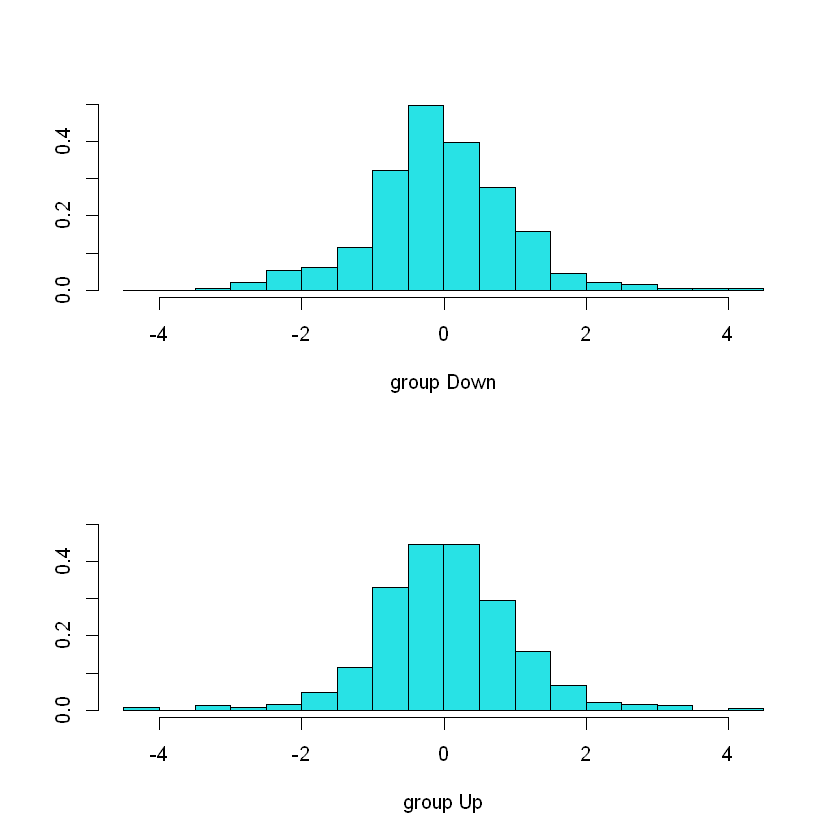

In [8]:
plot(lda.fit)

In [10]:
Smarket.2005=Smarket[!train,]
lda.pred=predict(lda.fit, Smarket.2005)
names(lda.pred)

[1] "class"     "posterior" "x"

In [13]:
lda.class=lda.pred$class
Direction.2005=Direction[!train]
table(lda.class,Direction.2005)

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

In [14]:
mean(lda.class==Direction.2005)

[1] 0.5595238

In [15]:
sum(lda.pred$posterior[,1]>=.5)

[1] 70

In [17]:
sum(lda.pred$posterior[,1]<.5)

[1] 182

In [18]:
lda.pred$posterior[1:20,1] 
lda.class[1:20]

999      1000      1001      1002      1003      1004      1005      1006 
0.4901792 0.4792185 0.4668185 0.4740011 0.4927877 0.4938562 0.4951016 0.4872861 
     1007      1008      1009      1010      1011      1012      1013      1014 
0.4907013 0.4844026 0.4906963 0.5119988 0.4895152 0.4706761 0.4744593 0.4799583 
     1015      1016      1017      1018 
0.4935775 0.5030894 0.4978806 0.4886331

[1] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
[16] Up   Up   Down Up   Up  
Levels: Down Up

In [21]:
sum(lda.pred$posterior[,1]>.9)

[1] 0

In [24]:
qda.fit=qda(Direction~Lag1+Lag2,data=Smarket,subset=train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [26]:
qda.class=predict(qda.fit,Smarket.2005)$class
table(qda.class,Direction.2005)

         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

In [28]:
mean(qda.class==Direction.2005)

[1] 0.5992063

In [29]:
library(class)
train.X=cbind(Lag1,Lag2)[train,]
test.X=cbind(Lag1,Lag2)[!train,]
train.Direction=Direction[train]

In [30]:
set.seed(1) 
knn.pred=knn(train.X,test.X,train.Direction,k=1) 
table(knn.pred,Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

In [31]:
(83+43)/252

[1] 0.5

In [44]:
knn.pred=knn(train.X,test.X,train.Direction,k=3) 
table(knn.pred,Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   48 55
    Up     63 86

In [45]:
mean(knn.pred==Direction.2005)

[1] 0.531746